# LGM DATA SCIENCE INTERNSHIP

## By Asrithavalli
## Intermediate level Task 2:
## Prediction using Decision Tree Algorithm


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


Text(0.5, 1.0, 'Visualize co-Relationship between the features')

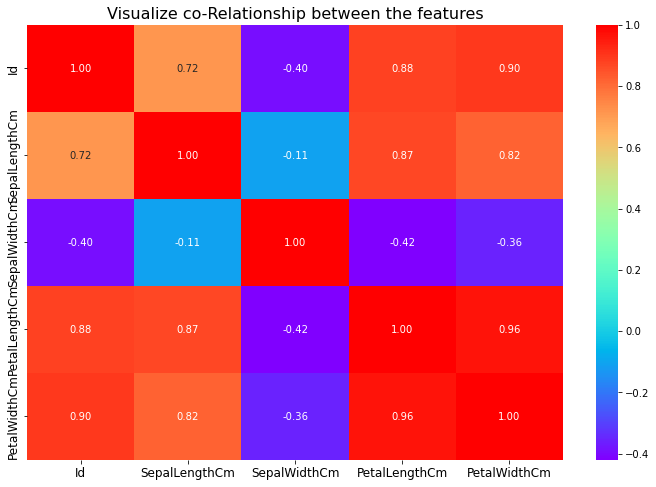

In [5]:
print(df.corr())
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Visualize co-Relationship between the features",fontsize=16)

In [6]:
x=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=10,splitter="best")
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [9]:
import pickle
pickle.dump(classifier,open('model','wb'))

In [10]:
model=pickle.load(open('model','rb'))
model

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [11]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

[Text(401.76000000000005, 362.4, 'Id <= 101.0\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-setosa'),
 Text(267.84000000000003, 217.44, 'Id <= 50.5\nentropy = 1.0\nsamples = 76\nvalue = [39, 37, 0]\nclass = Iris-virginica'),
 Text(133.92000000000002, 72.47999999999996, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-virginica'),
 Text(401.76000000000005, 72.47999999999996, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-versicolor'),
 Text(535.6800000000001, 217.44, 'entropy = 0.0\nsamples = 44\nvalue = [0, 0, 44]\nclass = Iris-setosa')]

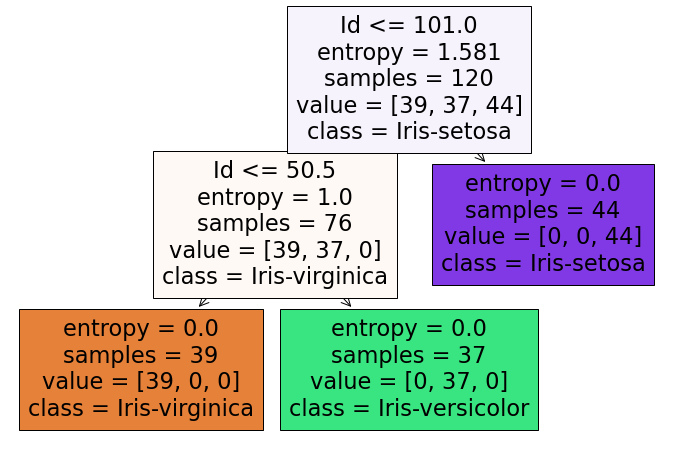

In [13]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True,impurity=True,feature_names=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'],
                class_names=['Iris-virginica','Iris-versicolor','Iris-setosa'])

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


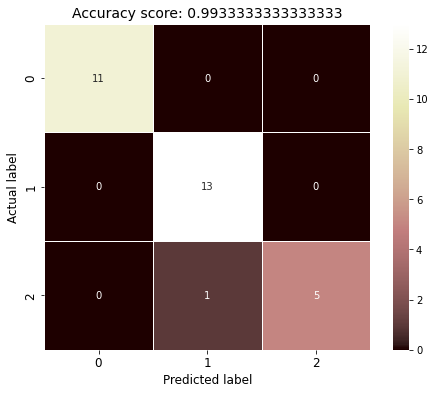

In [16]:
score=model.score(x,y)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt=".0f",linewidths=0.5,square=True,cmap='pink');
plt.ylabel('Actual label',fontsize=12);
plt.xlabel('Predicted label',fontsize=12);
plt.title('Accuracy score: {}'.format(score),size=14)
plt.tick_params(labelsize=12)


In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy:  96.66666666666667 %


In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

